In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

url = "../../../Week_5/amz_uk_price_prediction_dataset.csv"

df = pd.read_csv(url)

In [2]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Crosstab Analysis:

# Create a crosstab between the product category and the isBestSeller status.

crosstab = pd.crosstab(df["category"], df["isBestSeller"])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
# Are there categories where being a best-seller is more prevalent?
# No. 

# Hint: one option is to calculate the proportion of best-sellers for each category and then 
# sort the categories based on this proportion in descending order.

proportions = pd.crosstab(df["category"], df["isBestSeller"], normalize="index")
proportions.sort_values(by=True, ascending=False)

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


In [5]:
# Statistical Tests:

from scipy.stats import chi2_contingency

#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
chi2_statistic, chi2_p_value

# There is a significant association between category and isBestSeller. 
# A product may be a best-seller depending on the category. 
# Some categories have a higher prevalence of best-sellers than others.

(np.float64(36540.20270061387), np.float64(0.0))

In [6]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats.contingency import association

association(crosstab, method="cramer")

# The Cramér's V value of 0.122 suggests a weak association between the two variables. 
# Though statistically significant, the strength of this relationship is not very strong in practical terms.

0.1222829439760564

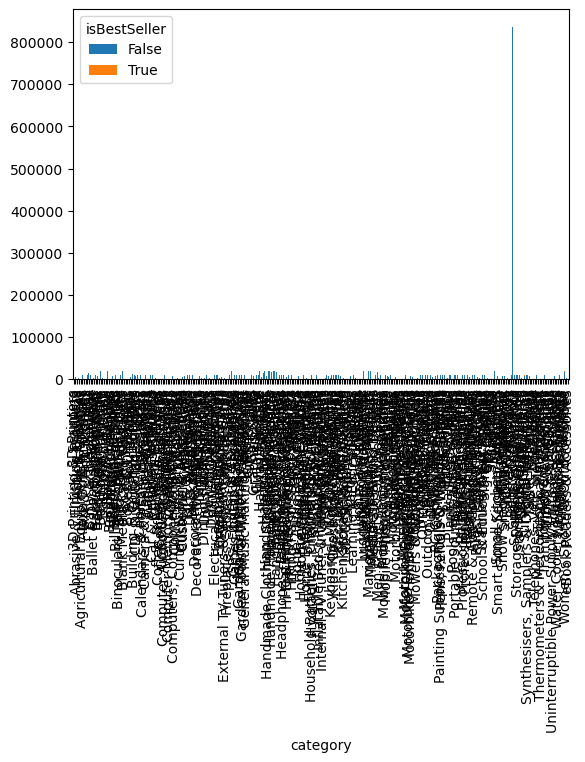

In [7]:
# Visualizations:

# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab.plot(kind="bar", stacked=True);
plt.show()

In [8]:
# Preliminary Step: Remove outliers in product prices.

# For this purpose, we can use the IQR (Interquartile Range) method. 
# Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. 
# The next steps will be done with the dataframe without outliers.

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

clean_product = df["price"]  
outliers = tukeys_test_outliers(clean_product)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


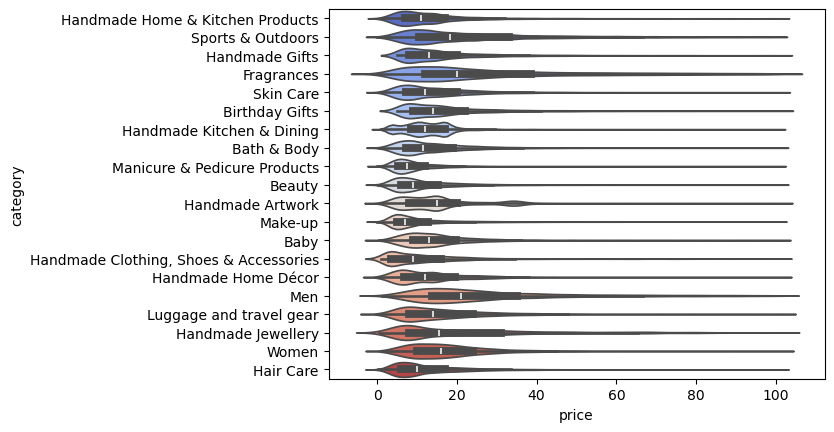

In [12]:
# Use a violin plot to visualize the distribution of price across different product categories. 
# Filter out the top 20 categories based on count for better visualization.
top_categories = df["category"].value_counts().nlargest(20).index
no_outliers = df[~df["price"].isin(outliers)]
filtered_df = no_outliers[no_outliers["category"].isin(top_categories)]

sns.violinplot(data=filtered_df, x="price", y="category", palette="coolwarm", hue="category", legend=False)
plt.show()

# Which product category tends to have the highest median price? Don't filter here by top categories.

/var/folders/cc/xy5m3kmd0m5djm7ph3v3pws40000gp/T/ipykernel_9542/2109219092.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values, y=avg_price.index, palette="coolwarm")


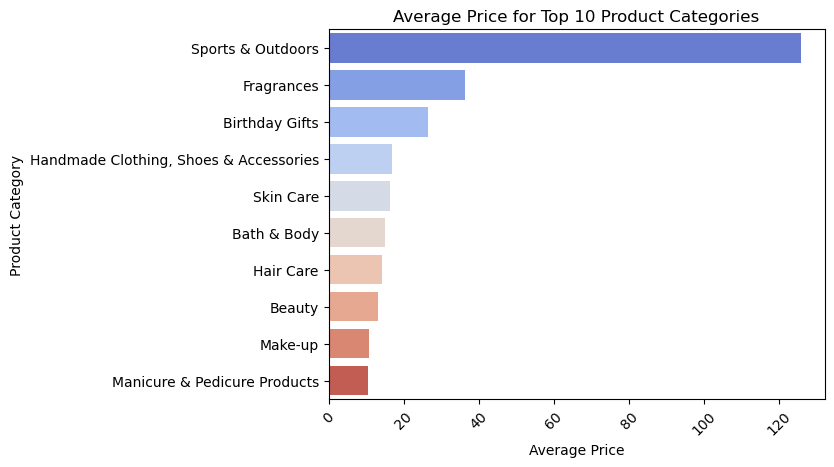

In [19]:
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top_10_categories = df["category"].value_counts().nlargest(10).index
top10 = df[df["category"].isin(top_10_categories)]
avg_price = top10.groupby("category")["price"].mean().sort_values(ascending=False)

sns.barplot(x=avg_price.values, y=avg_price.index, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.title("Average Price for Top 10 Product Categories")
plt.show()

# Which product category commands the highest average price? Don't filter here by top categories.
# Sports and Outdoors.

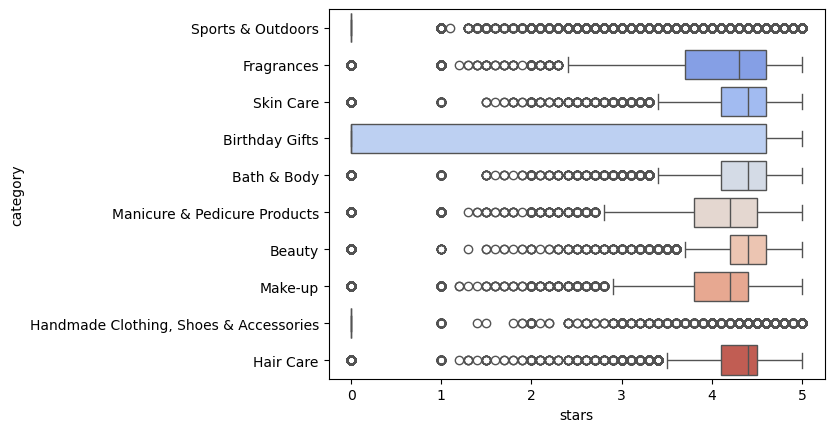

In [22]:
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots. 
# Filter out the top 10 categories based on count for better visualization.
top_10_categories = df["category"].value_counts().nlargest(10).index
top10 = df[df["category"].isin(top_10_categories)]
prod_ratings = top10.groupby("category")["stars"].mean().sort_values(ascending=False)

sns.boxplot(data=top10, x="stars", y="category", palette="coolwarm", hue="category", legend=False)
plt.show()

# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [23]:
# Correlation Coefficients:

# Calculate the correlation coefficient between price and stars.
correlation = df["price"].corr(df["stars"])
correlation

# Is there a significant correlation between product price and its rating?

# there is a very slight tendency for the price to decrease as the stars increases, but it’s almost negligible.

np.float64(-0.1249067326214854)

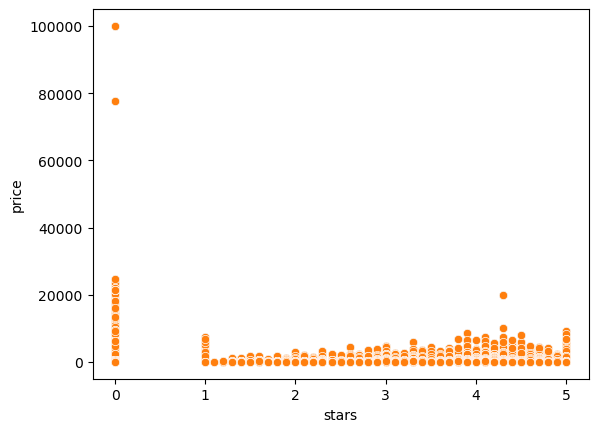

In [26]:
# Visualizations:

# Use a scatter plot to visualize the relationship between product rating and price. 
sns.scatterplot(data=df, x="stars", y="price");
plt.show()

# What patterns can you observe?

# There are a lot of prices with 0 stars, which likely means no rating was given. 
# Most of the ratings seem to be tending toward the interval between 4 and 5 stars.

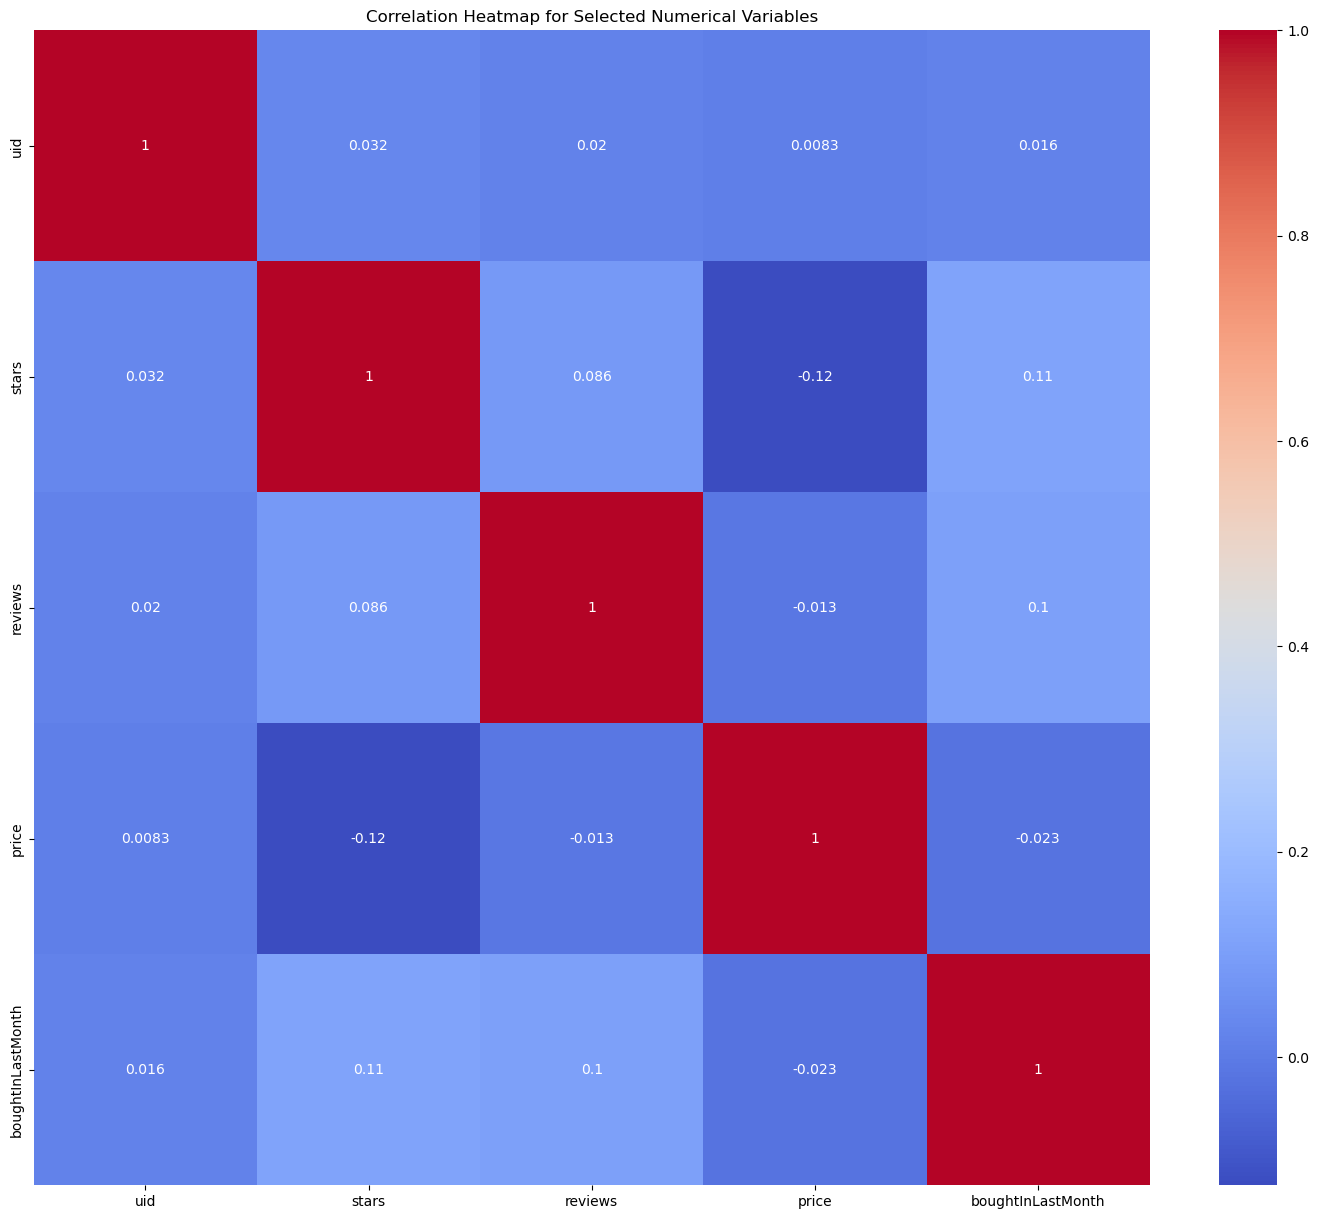

In [28]:
# Use a correlation heatmap to visualize correlations between all numerical variables.

potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

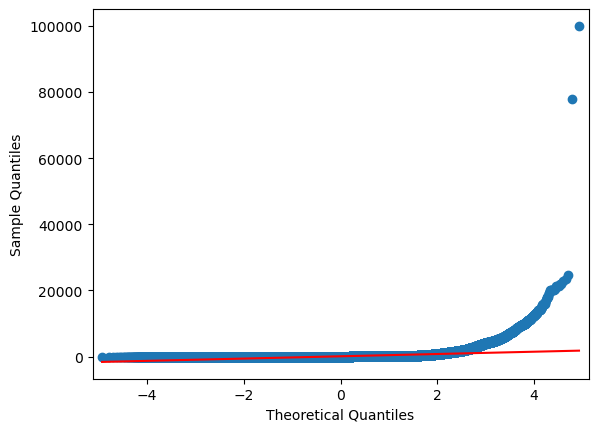

In [32]:
# Examine if product prices typically follow a normal distribution using a QQ plot.

import statsmodels.api as sm

sm.qqplot(df["price"], line='s')
plt.show()